# 기계학습

## 분류

### 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

### 그래프 한글 깨짐 방지

In [2]:
!git clone https://github.com/joyfulspace/ADP.git

Cloning into 'ADP'...
remote: Enumerating objects: 2561, done.
remote: Counting objects: 100% (2254/2254), done.
remote: Compressing objects: 100% (2248/2248), done.
remote: Total 2561 (delta 61), reused 2135 (delta 4), pack-reused 307
Receiving objects: 100% (2561/2561), 56.71 MiB | 26.03 MiB/s, done.
Resolving deltas: 100% (183/183), done.
Checking out files: 100% (2407/2407), done.


In [3]:
from matplotlib import font_manager, rc
path = 'ADP/file/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)

### 데이터 로딩

In [4]:
df = pd.read_csv('ADP/data/bikeshare.csv')

### 데이터 구조 확인

In [5]:
df.head() #CCCCC

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,A,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,A,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,A,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,A,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,A,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.tail()  #CCCCC

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00,D,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00,D,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00,D,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00,D,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00,D,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
df.shape 

(10886, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1020.7+ KB


### 데이터 타입 맞춰주기

In [9]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
# type별로 컬럼 분류
col_id = []
col_dt = ['datetime']
col_cat = ['season']
col_int = ['weather', 'humidity','casual','registered','count']
col_float = ['temp','atemp','windspeed']
col_bool = ['holiday','workingday']
col_num = col_int + col_float

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])
df[col_cat]= df[col_cat].astype('str')
df[col_int] = df[col_int].astype('int', errors='ignore')
df[col_float] = df[col_float].astype('float')

### DQ Check (빈도분석, 분포분석)

#### 연속형 변수

In [12]:
def DA(data):
    # 숫자형 변수의 분포 요약 함수
    da = data.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
    da = da.T
    df1 = data.isna().sum() # 결측값
    df1.name = 'missing'
    df2 = data.median() # 중앙값
    df2.name = 'median'
    df3 = np.var(data) # 분산
    df3.name = 'variance'
    df4 = data.skew() # 왜도 : 양수면 왼쪽으로 치우침
    df4.name = 'skewness'
    df5 = data.kurtosis() # 첨도 : 0보다 클수록 뾰족함
    df5.name = 'kurtosis'

    da = pd.concat([da,df1,df2,df3,df4,df5], axis=1) # 모두 합침
    da['total'] = da['count'] + da['missing'] # 전체 데이터 수

    # 컬럼 순서 보기 좋게 정렬
    col_nm = da.columns.tolist()
    order = ['total','count','missing','mean','median','std','variance','skewness','kurtosis','min',
             '5%','10%','25%','50%','75%','90%','95%','max']
    col_nm_new=[]
    for i in order:
        col_nm_new.append(i)
#     col_nm_new.extend(col_nm[3:12])
    da = da[col_nm_new]
    
    # 소수점 둘째자리 반올림
    da = da.round(2) 
    return da

In [13]:
DA1 = DA(df[col_num])
#DA1.to_csv('빈도분포분석_연속형.csv', encoding='cp949')

In [14]:
DA1

,total,count,missing,mean,median,std,variance,skewness,kurtosis,min,5%,10%,25%,50%,75%,90%,95%,max
weather,10886.0,10886.0,0,1.42,1.00,0.63,0.40,1.24,0.40,1.00,1.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00
humidity,10886.0,10886.0,0,61.89,62.00,19.25,370.34,-0.09,-0.76,0.00,31.00,37.00,47.00,62.00,77.00,88.00,93.00,100.00
casual,10886.0,10886.0,0,36.02,17.00,49.96,2495.82,2.50,7.55,0.00,0.00,1.00,4.00,17.00,49.00,94.00,141.00,367.00
registered,10886.0,10886.0,0,155.55,118.00,151.04,22810.69,1.52,2.63,0.00,4.00,7.00,36.00,118.00,222.00,354.00,464.00,886.00
count,10886.0,10886.0,0,191.57,145.00,181.14,32810.30,1.24,1.30,1.00,5.00,9.00,42.00,145.00,284.00,452.00,563.75,977.00
temp,10886.0,10886.0,0,20.23,20.50,7.79,60.70,0.00,-0.91,0.82,8.20,9.84,13.94,20.50,26.24,30.34,32.80,41.00
atemp,10886.0,10886.0,0,23.66,24.24,8.47,71.81,-0.10,-0.85,0.76,9.85,12.12,16.66,24.24,31.06,34.09,36.36,45.46
windspeed,10886.0,10886.0,0,12.80,13.00,8.16,66.65,0.59,0.63,0.00,0.00,0.00,7.00,13.00,17.00,24.00,28.00,57.00


#### 범주형 변수

In [15]:
# 범주형 변수 빈도분석
def DA_cat(data, col_cat):
    DA_cat = pd.DataFrame()
    
    for i in col_cat:
        a = data[i].value_counts(dropna=False).to_frame().sort_index().rename(columns={i:'count'}).reset_index()
        a['col_nm'] = i
        a = a.rename(columns = {'index':'class'})
        a = a[['col_nm','class','count']]
        b=data[i].value_counts(dropna = False, normalize = True).to_frame().sort_index().rename(
        columns = {i:'ratio'}).reset_index()
        b = b['ratio'].to_frame()
        b['ratio'] = b['ratio'].round(2)
        c = pd.concat([a,b], axis = 1)
        DA_cat = pd.concat([DA_cat, c], axis=0)
    DA_cat = DA_cat.reset_index(drop=True)
    return DA_cat

In [16]:
DA2 = DA_cat(df,col_cat+col_bool)
# DA2.to_csv('빈도분포분석_범주형.csv', encoding='cp949', errors='ignore')
DA2

,col_nm,class,count,ratio
0,season,A,2686,0.25
1,season,B,2733,0.25
2,season,C,2733,0.25
3,season,D,2734,0.25
4,holiday,0,10575,0.97
5,holiday,1,311,0.03
6,workingday,0,3474,0.32
7,workingday,1,7412,0.68


### 전처리(중복값, 결측치, 이상치 처리)

#### 중복값

In [19]:
# 중복값 확인
df[df.duplicated(keep=False)] 

# 중복값 있다면
#df.drop_duplicates() # 행 내용이 동일한 경우 제거
#df.drop_duplicates(['col1'], keep='last') # col1기준 중복값중 마지막만 남겨둠

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


#### 결측치

In [20]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# na 처리 : dropna(), fillna()
df.dropna() # nan이 하나라도 들어간 행은 삭제
df.dropna(how = 'all') # 데이터가 모두 nan인 행만 삭제 / 초기값:'any'
## Parameters
# axis = 'index' / 'columns'
# subset = ['col1', 'col2', ...] # 적용 대상 컬럼 특정

df.fillna(0) # na를 0으로 채우기

new_data = {'a':0, 'b':1, 'c':-999}
df.fillna(new_data) # na 발생 시 a 열에는 0, b 열에는 1, c 열에는 -999로 채움
df.fillna(new_data, limit = 2) # 각 열별로 2개의 nan까지 대체
df.fillna(method = 'ffill') # 열 별로 바로 앞의 데이터로 채움
df.fillna(method = 'bfill') # 열 별로 바로 뒤의 데이터로 채움
# ffill의 경우 첫 행이거나, 앞의 데이터가 nan일 경우 nan유지. bfill도 반대로 동일

# 평균값, 중앙값으로 대치
df.loc[19,'Leaflets'] = df['Leaflets'].mean() # 평균값으로 
df.loc[19,'Leaflets'] = df['Leaflets'].median # 중앙값으로

#### 이상치

In [21]:
tmp = 'humidity'

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


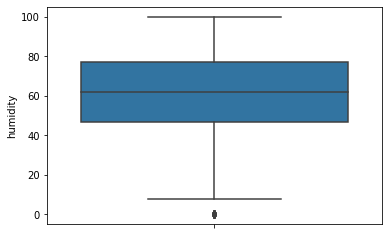

In [22]:
sns.boxplot(y = tmp, data = df, orient = 'h')

In [23]:
# IQR 활용
q1 = df[tmp].quantile(.25)
q3 = df[tmp].quantile(.75)
iqr = q3-q1
min_iqr = q1 - 1.5 * iqr
max_iqr = q3 + 1.5 * iqr
min_from_all = df[tmp].min()
max_from_all = df[tmp].max()
if (min_iqr < min_from_all) :
    min_iqr = min_from_all
if (max_iqr > max_from_all) :
    max_iqr = max_from_all

outlier = df[(df[tmp] < min_iqr ) | (df[tmp] > max_iqr)] # 이상치 조회
outlier_index = outlier.index
print(outlier.shape)
outlier

(22, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,A,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,A,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,A,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,A,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,A,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,A,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,A,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,A,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,A,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,A,0,1,3,16.40,20.455,0,16.9979,6,5,11


##### 이상치 해결 방법

In [28]:
# min/max값으로 보정
#df[tmp] = df[tmp].clip(lower=min_iqr, upper=max_iqr) # 이상치 보정 (상한, 하한 지정)

# 이상치 제거
df = df.drop(outlier_index, axis=0)
df.shape

(10864, 12)

### 요약데이터로 변환

In [29]:
df.groupby('season').aggregate({'datetime':'count','temp': 'min', 'windspeed':np.mean, 'count': np.sum})

,datetime,temp,windspeed,count
season,,,,
A,2664,0.82,14.612957,311875
B,2733,9.84,13.405607,588282
C,2733,15.58,11.508862,640662
D,2734,5.74,11.678147,544034


### 파생변수 생성 (파머 책 p.452 참고)

In [30]:
# Recency
today = pd.to_datetime('2020-12-13') # 아니면 그냥 각 ID별로 최대값을 today에서 빼기 = ID별 Recency가 같음
cond1 = (today-df['datetime']) >= pd.Timedelta('3000 days')
cond2 = ((today-df['datetime']) < pd.Timedelta('3000 days'))&((today-df['datetime']) >= pd.Timedelta('2000 days'))
cond3 = (today-df['datetime']) < pd.Timedelta('2000 days')

df.loc[cond1, 'Recency'] = 1
df.loc[cond2, 'Recency'] = 2
df.loc[cond3, 'Recency'] = 3

In [31]:
# Frenquency (빈도)  아니면 발생 count
df.loc[df['count']<=10, 'Frequency'] = 1
df.loc[(df['count']>10)&(df['count']<=20), 'Frequency'] = 2
df.loc[df['count']>20, 'Frequency'] = 3

In [33]:
# Monetary (거래규모) 아니면 발생 sum
df['Monetary'] = df['count'] * df['temp']

In [34]:
df['year'] = df['datetime'].map(lambda x: x.year)
df['month'] = df['datetime'].map(lambda x: x.month)
df['day'] = df['datetime'].map(lambda x: x.day)
df['hour'] = df['datetime'].map(lambda x: x.hour)
df['minute'] = df['datetime'].map(lambda x: x.minute)

In [35]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Recency,Frequency,Monetary,year,month,day,hour,minute
0,2011-01-01 00:00:00,A,0,0,1,9.84,14.395,81,0.0,3,13,16,1.0,2.0,157.44,2011,1,1,0,0
1,2011-01-01 01:00:00,A,0,0,1,9.02,13.635,80,0.0,8,32,40,1.0,3.0,360.80,2011,1,1,1,0
2,2011-01-01 02:00:00,A,0,0,1,9.02,13.635,80,0.0,5,27,32,1.0,3.0,288.64,2011,1,1,2,0


### 데이터 마트 DQ Check, 변수선택및 EDA

#### DQ Check

In [36]:
col_num = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'Monetary']
col_cat = ['season', 'holiday', 'workingday', 'Recency', 'Frequency']

In [37]:
DA3 = DA(df[col_num])
DA3

,total,count,missing,mean,median,std,variance,skewness,kurtosis,min,5%,10%,25%,50%,75%,90%,95%,max
weather,10864.0,10864.0,0,1.42,1.00,0.63,0.40,1.25,0.42,1.00,1.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00
temp,10864.0,10864.0,0,20.24,20.50,7.80,60.78,0.00,-0.92,0.82,8.20,9.84,13.94,20.50,26.24,30.34,32.80,41.00
atemp,10864.0,10864.0,0,23.66,24.24,8.48,71.91,-0.11,-0.85,0.76,9.85,12.12,16.66,24.24,31.06,34.09,36.36,45.46
humidity,10864.0,10864.0,0,62.01,62.00,19.06,363.32,-0.04,-0.89,8.00,31.00,37.00,47.00,62.00,77.00,88.00,93.00,100.00
windspeed,10864.0,10864.0,0,12.79,13.00,8.16,66.66,0.59,0.63,0.00,0.00,0.00,7.00,13.00,17.00,24.00,28.00,57.00
casual,10864.0,10864.0,0,36.09,17.00,49.99,2498.53,2.49,7.54,0.00,0.00,1.00,4.00,17.00,49.00,94.00,141.00,367.00
registered,10864.0,10864.0,0,155.81,119.00,151.08,22821.59,1.52,2.62,0.00,4.00,7.00,36.00,119.00,223.00,354.00,464.00,886.00
count,10864.0,10864.0,0,191.90,146.00,181.17,32821.26,1.24,1.30,1.00,5.00,9.00,43.00,146.00,284.00,453.00,564.00,977.00
Monetary,10864.0,10864.0,0,4440.41,2642.86,5024.94,25247714.04,1.66,2.88,0.82,63.96,139.40,619.51,2642.86,6509.16,11670.08,15170.00,30157.14


In [38]:
DA4 = DA_cat(df, col_cat)
DA4

,col_nm,class,count,ratio
0,season,A,2664,0.25
1,season,B,2733,0.25
2,season,C,2733,0.25
3,season,D,2734,0.25
4,holiday,0,10553,0.97
5,holiday,1,311,0.03
6,workingday,0,3474,0.32
7,workingday,1,7390,0.68
8,Recency,1.0,9497,0.87
9,Recency,2.0,1367,0.13


#### 변수 제외

In [ ]:
df = df.drop(columns = ['Frequency'], axis=1)

#### EDA

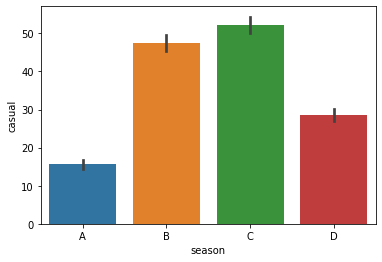

In [39]:
# 범주형 X별 y의 평균
sns.barplot(x='season', y='casual', data=df)

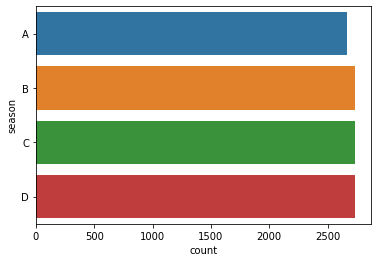

In [40]:
# 범주형(또는 가지수가 많지 않은 연속형) 변수의 데이터별 count
sns.countplot(y = 'season', data = df)

### 종속변수 전처리(이항 형태로 변환 / 4개 클래스로 변환)

In [41]:
# 이항 형태
df.loc[df['count'] <= 150, 'y1'] = 1
df.loc[df['count'] > 150, 'y1'] = 0

In [42]:
# 4개 클래스
df.loc[df['count'] <= 150, 'y2'] = 0
df.loc[(df['count']>150)&(df['count'] <= 300), 'y2'] = 1
df.loc[(df['count']>300)&(df['count'] <= 450), 'y2'] = 2
df.loc[df['count'] > 450, 'y2'] = 3

### 범주형 변수 더미화

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10864 non-null  datetime64[ns]
 1   season      10864 non-null  object        
 2   holiday     10864 non-null  int64         
 3   workingday  10864 non-null  int64         
 4   weather     10864 non-null  int32         
 5   temp        10864 non-null  float64       
 6   atemp       10864 non-null  float64       
 7   humidity    10864 non-null  float64       
 8   windspeed   10864 non-null  float64       
 9   casual      10864 non-null  int32         
 10  registered  10864 non-null  int32         
 11  count       10864 non-null  int32         
 12  Recency     10864 non-null  float64       
 13  Monetary    10864 non-null  float64       
 14  year        10864 non-null  int64         
 15  month       10864 non-null  int64         
 16  day         10864 non-

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Recency,Monetary,year,month,day,hour,minute,y1,y2
0,2011-01-01 00:00:00,A,0,0,1,9.84,14.395,81.0,0.0,3,13,16,1.0,157.44,2011,1,1,0,0,1.0,0.0
1,2011-01-01 01:00:00,A,0,0,1,9.02,13.635,80.0,0.0,8,32,40,1.0,360.80,2011,1,1,1,0,1.0,0.0
2,2011-01-01 02:00:00,A,0,0,1,9.02,13.635,80.0,0.0,5,27,32,1.0,288.64,2011,1,1,2,0,1.0,0.0
3,2011-01-01 03:00:00,A,0,0,1,9.84,14.395,75.0,0.0,3,10,13,1.0,127.92,2011,1,1,3,0,1.0,0.0
4,2011-01-01 04:00:00,A,0,0,1,9.84,14.395,75.0,0.0,0,1,1,1.0,9.84,2011,1,1,4,0,1.0,0.0


In [44]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

y, X = dmatrices('y2 ~ season+holiday+workingday+weather+temp+atemp+humidity+windspeed+casual\
+registered+Recency+Monetary', data=df, return_type='dataframe')

### VIF 확인 필요 (y값 섞여 들어가지 않게 주의!!)

In [45]:
# y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,56.314408,Intercept
1,2.535383,season[T.B]
2,4.129738,season[T.C]
3,2.580344,season[T.D]
4,1.075556,holiday
5,1.428789,workingday
6,1.282391,weather
7,43.474120,temp
8,37.339966,atemp
9,1.743745,humidity


In [46]:
X = X.drop(columns=['temp'])

In [47]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,56.306543,Intercept
1,2.455552,season[T.B]
2,3.722530,season[T.C]
3,2.569020,season[T.D]
4,1.074492,holiday
5,1.423276,workingday
6,1.279043,weather
7,3.751375,atemp
8,1.731370,humidity
9,1.157455,windspeed


### train, test split

In [48]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.3, random_state=0)

### StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [50]:
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [51]:
# 컬럼명 다시 붙여주기
X_train_scale = pd.DataFrame(X_train_scale, columns= X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns= X_test.columns)

### 오버샘플링 수행

In [52]:
y_train.value_counts()

y2 
0.0    3885
1.0    1986
2.0     971
3.0     762
dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train_scale, y_train)

In [55]:
# 컬럼명 다시 붙여주기
X_train_over = pd.DataFrame(X_train_over, columns= X_train.columns)
y_train_over = pd.DataFrame(y_train_over, columns=['y2'])

In [56]:
y_train_over.value_counts()

y2 
0.0    3885
1.0    3885
2.0    3885
3.0    3885
dtype: int64

### 군집화 수행

In [61]:
# X_train_over, X_test_scale, y_train_over, y_test이 현재 변수

from sklearn.cluster import KMeans

# 바로 최적 개수 찾기
def elbow(X, range_list=range(1,11)):
    sse = [] # 오차제곱합
    for i in range_list:
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range_list, sse, marker ='o')
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()

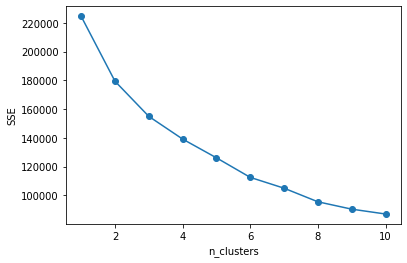

In [58]:
elbow(X_train_over)

#### 실루엣 계수
- 군집 안에 있는 데이터들이 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링 평가하는 척도
- 각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구함
  1. a(i): 클러스터 A 안의 포인트 i와 A 안의 다른 포인트들간의 거리 평균
  2. b(i): A 외 다른 클러스터와 i와의 거리 평균 중 가장 작은 값
  3. $s(i)=\frac{b(i)-a(i)}{max(a(i), b(i))}, -1\le s(i)\le 1$
  4. 모든 점마다 실루엣 계수를 계산한 뒤, 실루엣 계수의 평균값 계산
- 실루엣 계수의 평균값이 1에 가까울수록 군집화가 잘 되었다고 볼 수 있음
- 0에 가까우면 거리가 비슷한 경우, -1에 가까우면 잘못 할당된 상태(같은 클러스터의 점보다 이웃 클러스터가 더 가까움)

[출처] https://studying-haeung.tistory.com/10#:~:text=실루엣%20계수(Silhouette%20Coefficient)%20%3A,하는%20척도로%20활용된다.



In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score

def sil(X):
    si = [] # 실루엣계수
    for i in range(2,11): # cluster가 2개인것 부터 10개까지!!!!
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        si.append(silhouette_score(X, km.labels_))
    print(np.round(si,3))
sil(X_train_over)

[0.194 0.21  0.201 0.205 0.223 0.216 0.238 0.232 0.225]


#### 군집 수 직접 지정해서 군집화

In [67]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(X_train_over)

KMeans(n_clusters=4, random_state=0)

### 군집화 결과 프로파일링

In [68]:
# 스케일링 풀고 프로파일링

df_profile = pd.DataFrame(scaler.inverse_transform(X_train_over), columns = X_train.columns)
df_profile['kmeans'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


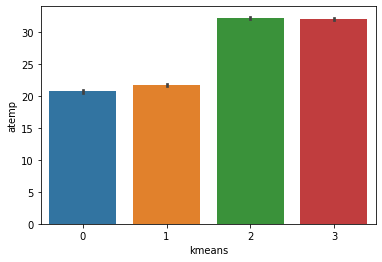

In [69]:
sns.barplot(df_profile['kmeans'], df_profile['atemp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


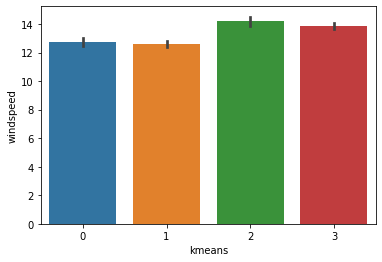

In [70]:
sns.barplot(df_profile['kmeans'], df_profile['windspeed'])

### 군집 결과 성능 평가

In [71]:
a = y_train_over['y2'].astype('int')

In [72]:
a.value_counts().sort_index()

0    3885
1    3885
2    3885
3    3885
Name: y2, dtype: int64

In [73]:
b = df_profile['kmeans']

In [74]:
b.value_counts().sort_index()

0    2147
1    6845
2    2446
3    4102
Name: kmeans, dtype: int64

In [76]:
# y의 class와 군집화 class의 이름을 맞추지 않으면 matrix가 안 맞는다
# 세로가 actual값, 가로가 예측값 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(a, b, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.17      0.09      0.12      3885
     class 1       0.37      0.65      0.47      3885
     class 2       0.45      0.28      0.35      3885
     class 3       0.48      0.51      0.50      3885

    accuracy                           0.38     15540
   macro avg       0.37      0.38      0.36     15540
weighted avg       0.37      0.38      0.36     15540



In [77]:
target_name_pred = ['예측_'+i for i in target_names]
target_name_actual = ['실제_'+i for i in target_names]

In [78]:
confusion = pd.DataFrame(confusion_matrix( a, b))
confusion.columns = target_name_pred
confusion.index = target_name_actual
confusion

,예측_class 0,예측_class 1,예측_class 2,예측_class 3
실제_class 0,356,3510,0,19
실제_class 1,477,2521,141,746
실제_class 2,694,739,1101,1351
실제_class 3,620,75,1204,1986


### 군집화 결과를 새로운 컬럼으로 추가(train, test 모두 수행)

In [79]:
X_train_over['kmeans'] = kmeans.labels_

In [80]:
kmeans_test = kmeans.predict(X_test_scale)
X_test_scale['kmeans'] = kmeans_test

### 모델링

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [82]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
# num_instances = len(X_train_over)

#### 기초모델

In [83]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))

In [84]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier()),
 ('MLP', MLPClassifier())]

In [85]:
results = []
names = []

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)
# kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

for name, model in models:
    cv_results = cross_val_score(model, X_train_over, y_train_over.values.ravel(), cv=skf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "[%s]\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[LR]	mean: 0.992342	std: 0.002565
[LDA]	mean: 0.904118	std: 0.006638
[KNN]	mean: 0.956757	std: 0.003638
[CART]	mean: 0.990862	std: 0.002455
[NB]	mean: 0.898327	std: 0.005995
[RF]	mean: 0.992278	std: 0.002834


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

[MLP]	mean: 0.996332	std: 0.001524


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [86]:
names

['LR', 'LDA', 'KNN', 'CART', 'NB', 'RF', 'MLP']

In [87]:
for i in range(len(names)):
    print(names[i], np.mean(results[i]))

LR 0.9923423423423424
LDA 0.9041184041184043
KNN 0.9567567567567569
CART 0.9908622908622908
NB 0.8983268983268984
RF 0.9922779922779924
MLP 0.9963320463320464


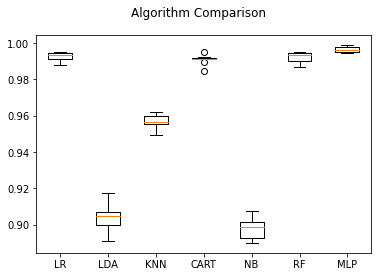

In [88]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 파라미터 튜닝 및 최종모델 선정

In [89]:
model = RandomForestClassifier()

n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set,
                  max_features = max_features_set)

grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = skf)
grid_result = grid.fit(X_train_over, y_train_over.values.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

a = grid_result.cv_results_

for i in range(len(a['rank_test_score'])):
    print('%f (%f) with: %r' %(a['mean_test_score'][i], a['std_test_score'][i], a['params'][i]))

# for params, mean_score, scores in grid_result.cv_results_:  ## 얘 에러난다
#     print('%f (%f) with: %r' %(mean_test_score.mean(), std_test_score.mean(), params))

Best: 0.994852 using {'max_features': None, 'n_estimators': 20}
0.983333 (0.003119) with: {'max_features': 'sqrt', 'n_estimators': 5}
0.989640 (0.002645) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.990090 (0.002157) with: {'max_features': 'sqrt', 'n_estimators': 15}
0.991184 (0.002193) with: {'max_features': 'sqrt', 'n_estimators': 20}
0.990541 (0.003166) with: {'max_features': 'sqrt', 'n_estimators': 25}
0.991699 (0.003337) with: {'max_features': 'sqrt', 'n_estimators': 30}
0.991377 (0.003062) with: {'max_features': 'sqrt', 'n_estimators': 35}
0.991248 (0.003075) with: {'max_features': 'sqrt', 'n_estimators': 40}
0.984041 (0.002169) with: {'max_features': 'log2', 'n_estimators': 5}
0.987838 (0.003132) with: {'max_features': 'log2', 'n_estimators': 10}
0.989897 (0.002638) with: {'max_features': 'log2', 'n_estimators': 15}
0.991441 (0.002864) with: {'max_features': 'log2', 'n_estimators': 20}
0.989897 (0.003851) with: {'max_features': 'log2', 'n_estimators': 25}
0.992278 (0.003

In [90]:
fine_tuned_RF = grid_result.best_estimator_
print('best params: ', grid_result.best_params_)
fine_tuned_RF.feature_importances_

best params:  {'max_features': None, 'n_estimators': 20}


array([0.00000000e+00, 7.99128829e-05, 1.30818246e-04, 2.37822166e-04,
       4.90180225e-04, 4.40926396e-05, 3.83916376e-04, 1.27829640e-02,
       2.05511770e-03, 1.07728730e-03, 2.42589406e-01, 6.52032679e-01,
       8.71228588e-05, 8.78355653e-02, 1.73115223e-04])

In [91]:
pd.DataFrame({'col':X_train_over.columns, 'FI':fine_tuned_RF.feature_importances_}).sort_values('FI', ascending=False)

,col,FI
11,registered,0.652033
10,casual,0.242589
13,Monetary,0.087836
7,atemp,0.012783
8,humidity,0.002055
9,windspeed,0.001077
4,holiday,0.000490
6,weather,0.000384
3,season[T.D],0.000238
14,kmeans,0.000173


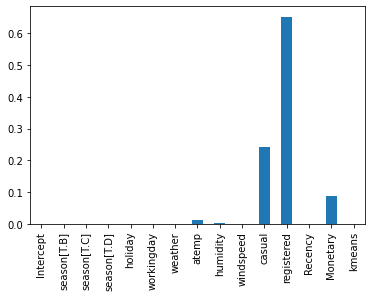

In [92]:
importances = pd.Series(fine_tuned_RF.feature_importances_, index =X_train_over.columns)
importances.plot(kind='bar')

In [93]:
y_train_over.values.ravel()

array([0., 0., 0., ..., 3., 3., 3.])

#### XGBoost 별도 수행(시간 없으니 꼭 필요할 때만 하기)

- 컬럼명에 대괄호, 콤마, 부등호가 있으면 에러남
- 수기로 바꿔줘야함

In [94]:
X_train_over.columns

Index(['Intercept', 'season[T.B]', 'season[T.C]', 'season[T.D]', 'holiday',
       'workingday', 'weather', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'Recency', 'Monetary', 'kmeans'],
      dtype='object')

In [95]:
X_train_over.columns = ['Intercept', 'season_B', 'season_C', 'season_D', 'holiday',
       'workingday', 'weather', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'Recency', 'Monetary', 'kmeans']

- GridsearchCV가 불안정하므로 수기로 max_depth만 바꿔서 두 번 해보기

In [96]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_over, y_train_over)


kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
# kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

cv_results = cross_val_score(xgb, X_train_over, y_train_over, cv=kfold, scoring=scoring)
# results.append(cv_results)
# names.append(name)
msg = "[%s]\tmean: %f\tstd: %f" % ('XGB', cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[XGB]	mean: 0.995624	std: 0.001404


In [97]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=5) # max_depth를 5로만 바꿈
xgb.fit(X_train_over, y_train_over)

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

cv_results = cross_val_score(xgb, X_train_over, y_train_over, cv=kfold, scoring=scoring)
msg = "[%s]\tmean: %f\tstd: %f" % ('XGB', cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[XGB]	mean: 0.995367	std: 0.001905


- 변수중요도 시각화

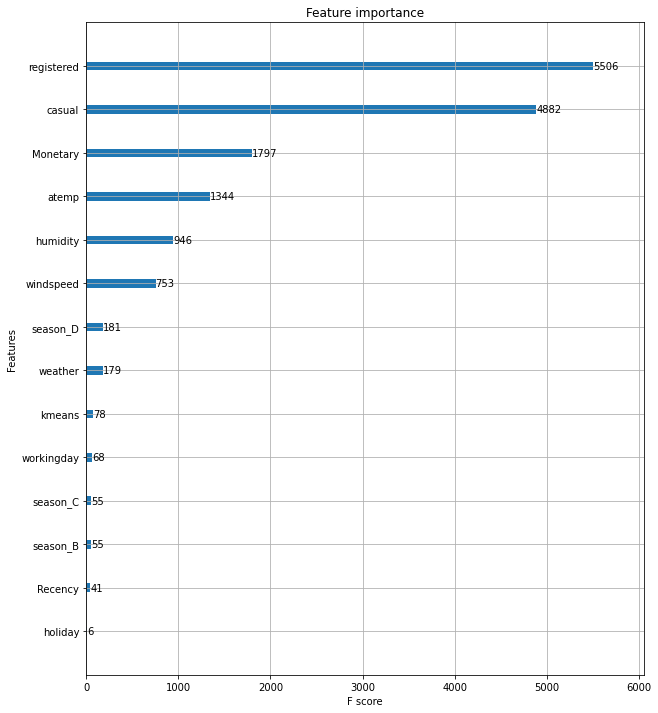

In [98]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb, ax=ax)

### Test set 활용하여 예측 수행

In [99]:
y_pred = fine_tuned_RF.predict(X_test_scale)

In [100]:
confusion_matrix(y_test, y_pred)

array([[1657,    7,    0,    0],
       [   5,  837,    5,    0],
       [   0,    5,  397,    6],
       [   0,    0,   11,  330]])

#### F1 score

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1664
         1.0       0.99      0.99      0.99       847
         2.0       0.96      0.97      0.97       408
         3.0       0.98      0.97      0.97       341

    accuracy                           0.99      3260
   macro avg       0.98      0.98      0.98      3260
weighted avg       0.99      0.99      0.99      3260



#### ROC AUC

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

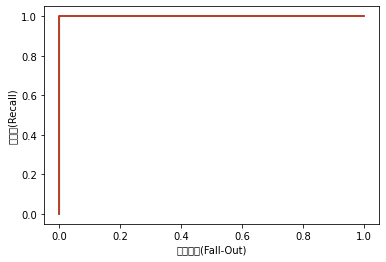

ROC_AUC :  [0.9999999779150358, 0.9999998343627687, 0.9999998233202866, 1.0]


In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
# from sklearn.naive_bayes import GaussianNB
# from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

# iris = load_iris()
# X = iris.data   # 독립변수가 있고


# 이 아래부터 활용하면 됨
X = X_train_over
y = label_binarize(y_train_over, classes = [0, 1, 2, 3])   # 종속변수 y를 더미화를 시킴

n = 4 # class 개수만큼(여기선 4개였음)
fpr = [None] * n
tpr = [None] * n
threshold = [None] * n
roc_auc = []

for i in range(n):   
    model = fine_tuned_RF.fit(X, y[:, i])   # 모델링을 함
    fpr[i], tpr[i], threshold[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    
    roc_auc.append(auc(fpr[i], tpr[i]))

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()
print('ROC_AUC : ',roc_auc)